In [1]:
from model.ctabgan import CTABGAN
from model.eval.evaluation import get_utility_metrics,stat_sim,privacy_metrics
import numpy as np
import pandas as pd
import glob

In [ ]:
num_exp = 1
dataset = "king"
real_path = "../CTGAN-main/Processed_Student_Data.csv"
fake_file_root = "Fake_Datasets"

In [7]:
df = pd.read_csv("Real_Datasets/king.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [8]:
synthesizer =  CTABGAN(raw_csv_path = real_path,
                 test_ratio = 0.20,
                 categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport','Extracurricular','Sports','Music','Volunteering','GradeClass'],   
                 log_columns = [],
                 mixed_columns= {},
                 general_columns= ["StudyTimeWeekly", "Absences",'GPA'],
                 non_categorical_columns= [],
                 integer_columns = [],
                 problem_type= {"Classification": "GradeClass"}) 

for i in range(num_exp):
    synthesizer.fit()

100%|████████████████████████████████████████████████████████████████████████████████| 70/70 [1:34:29<00:00, 81.00s/it]

Finished training in 5670.406294822693  seconds.


In [9]:
for i in range(3):
    syn = synthesizer.generate_samples()
    syn.to_csv(fake_file_root+"/"+dataset+"/"+ dataset+"_fake_{exp}_ctabplus.csv".format(exp=i), index= False)

In [10]:
fake_paths = glob.glob(fake_file_root+"/"+dataset+"/"+"*")

In [11]:
model_dict =  {"Regression":["l_reg","ridge","lasso","B_ridge"]}
result_mat = get_utility_metrics(real_path,fake_paths,"MinMax",model_dict, test_ratio = 0.20)

result_df  = pd.DataFrame(result_mat,columns=["Mean_Absolute_Percentage_Error","Explained_Varaince_Score","R2_Score"])
result_df.index = list(model_dict.values())[0]
result_df

,Mean_Absolute_Percentage_Error,Explained_Varaince_Score,R2_Score
l_reg,-3.667189e+13,0.029247,0.033042
ridge,-3.387282e+13,0.028287,0.031935
lasso,7.172388e+12,0.000000,0.000745
B_ridge,-3.631935e+13,0.029347,0.032901


In [12]:
# ctabplus
insurance_categorical = ['bedrooms', "floors", 'waterfront', 'view', 'condition', 'grade','zipcode']
stat_res_avg = []
for fake_path in fake_paths:
    stat_res = stat_sim(real_path,fake_path,insurance_categorical)
    stat_res_avg.append(stat_res)

stat_columns = ["Average WD (Continuous Columns","Average JSD (Categorical Columns)","Correlation Distance"]
stat_results = pd.DataFrame(np.array(stat_res_avg).mean(axis=0).reshape(1,3),columns=stat_columns)
stat_results

column:  Gender WD:  0.0025083612040133763
column:  Ethnicity WD:  0.018952062430323286
column:  ParentalEducation WD:  0.015886287625418088
column:  StudyTimeWeekly WD:  0.0791053650934068
column:  Absences WD:  0.05892780386821804
column:  Tutoring WD:  0.015050167224080258
column:  ParentalSupport WD:  0.008988294314381272
column:  Extracurricular WD:  0.0656354515050167
column:  Sports WD:  0.053511705685618804
column:  Music WD:  0.008779264214046845
column:  Volunteering WD:  0.04222408026755853
column:  GPA WD:  0.03967040641758106
column:  GradeClass WD:  0.010451505016722403
column:  Gender WD:  0.007525083612040129
column:  Ethnicity WD:  0.024386845039018962
column:  ParentalEducation WD:  0.010346989966555208
column:  StudyTimeWeekly WD:  0.07820918189904784
column:  Absences WD:  0.0492289473737728
column:  Tutoring WD:  0.00836120401337792
column:  ParentalSupport WD:  0.014318561872909679
column:  Extracurricular WD:  0.05978260869565222
column:  Sports WD:  0.0464046822

,Average WD (Continuous Columns,Average JSD (Categorical Columns),Correlation Distance
0,0.031404,NaN,0.577391


In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

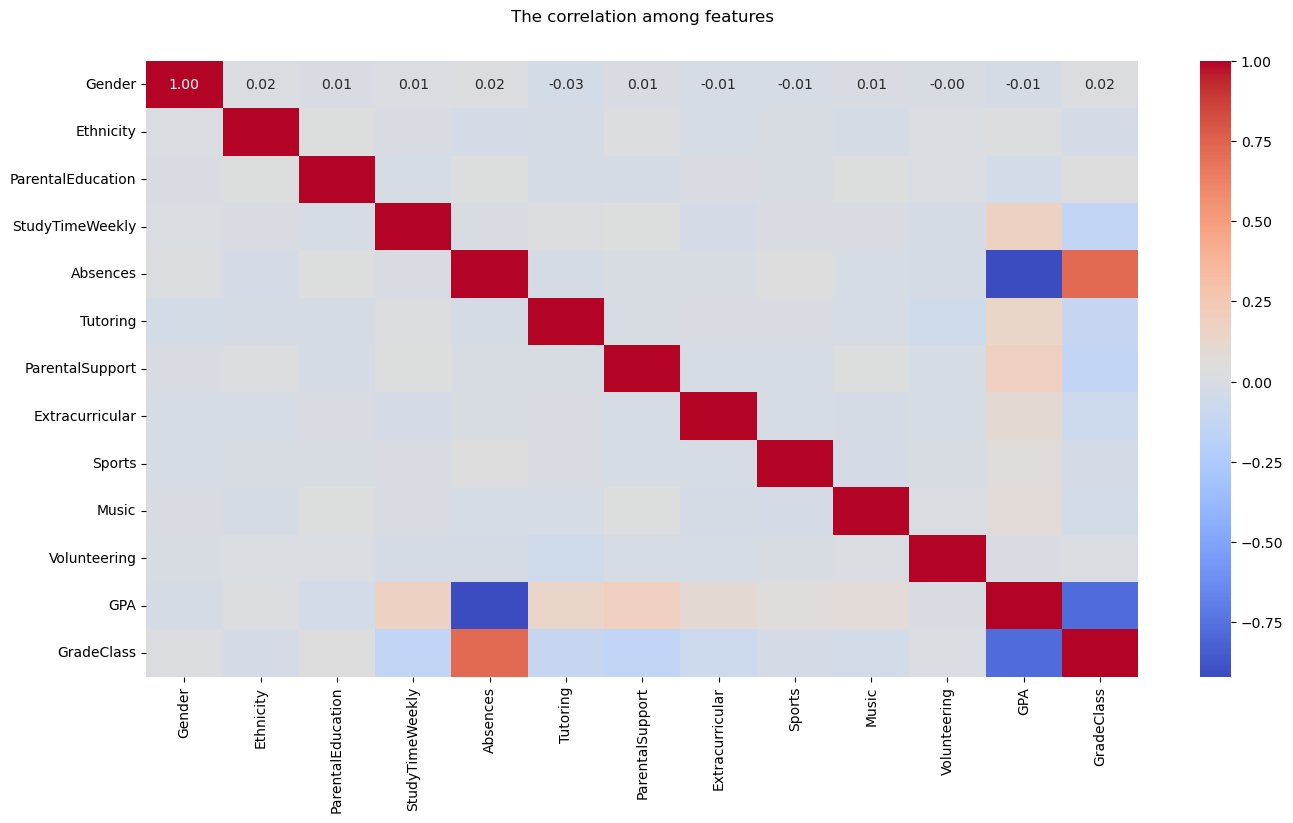

In [ ]:
df = pd.read_csv( "../CTGAN-main/Processed_Student_Data.csv")
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot = True, fmt=".2f", cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()

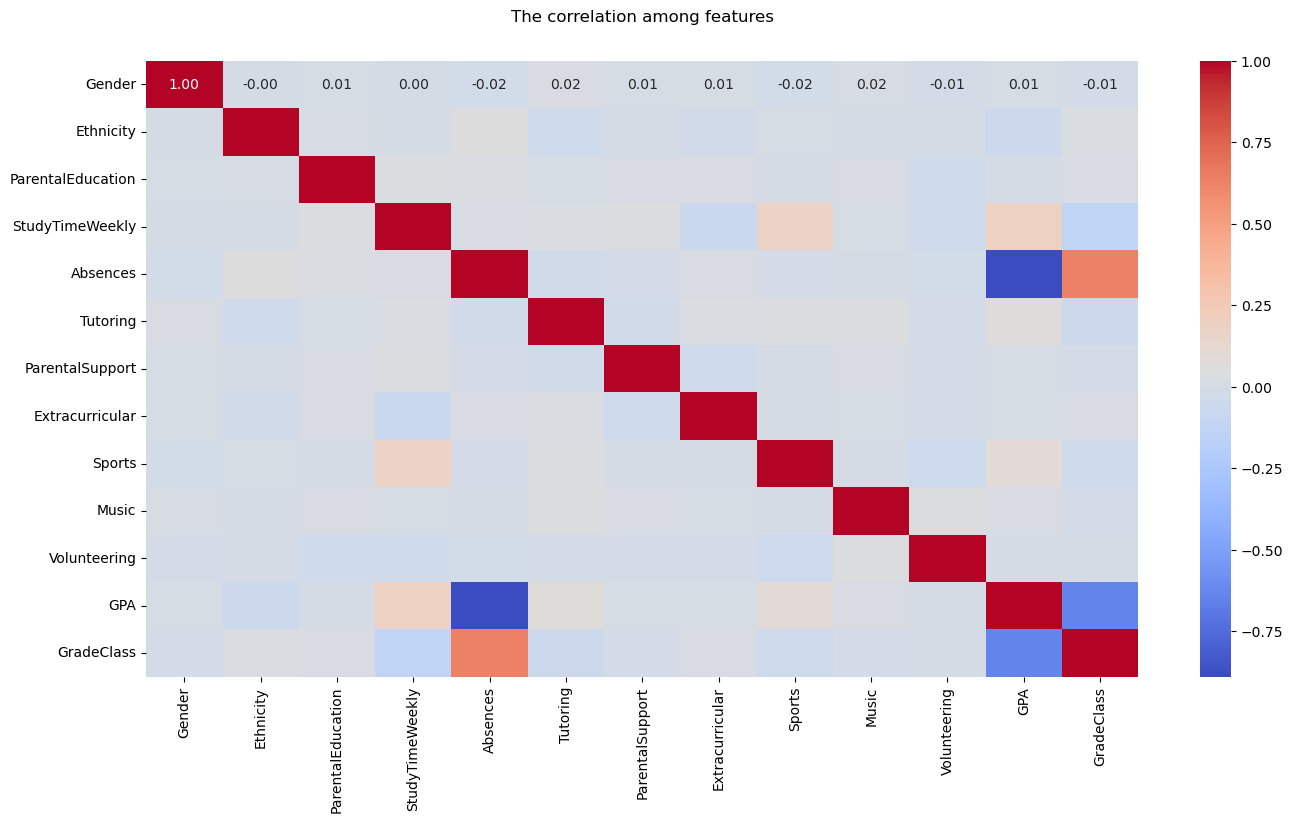

In [18]:
df = pd.read_csv('Fake_Datasets/king/king_fake_0_ctabplus.csv')
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot = True, fmt=".2f", cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()